# ANIME RECOMENDATION SYSTEM
--KNN IMPLEMENTATION--

# Imorting all libraries 

In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors


# Extracting the dataset 

In [10]:
anime = pd.read_csv(r"anime.csv")
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12288,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12289,5543,Under World,Hentai,OVA,1,4.28,183
12290,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12291,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


# checking for NULL values and datatypes

In [11]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12293 entries, 0 to 12292
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12293 non-null  int64  
 1   name      12293 non-null  object 
 2   genre     12231 non-null  object 
 3   type      12268 non-null  object 
 4   episodes  12293 non-null  object 
 5   rating    12063 non-null  float64
 6   members   12293 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [12]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [13]:
anime.describe()

,anime_id,rating,members
count,12293.000000,12063.000000,1.229300e+04
mean,14058.616774,6.473794,1.806954e+04
std,11455.676878,1.026721,5.482254e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.000000,5.880000,2.250000e+02
50%,10261.000000,6.570000,1.549000e+03
75%,24795.000000,7.180000,9.431000e+03
max,34527.000000,10.000000,1.013917e+06


# Data Visulization

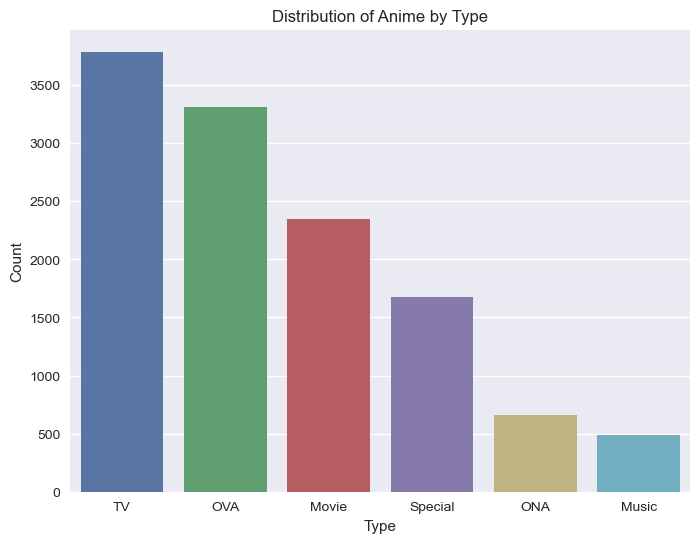

In [14]:
anime_type_counts = anime['type'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=anime_type_counts.index, y=anime_type_counts.values)
plt.title('Distribution of Anime by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

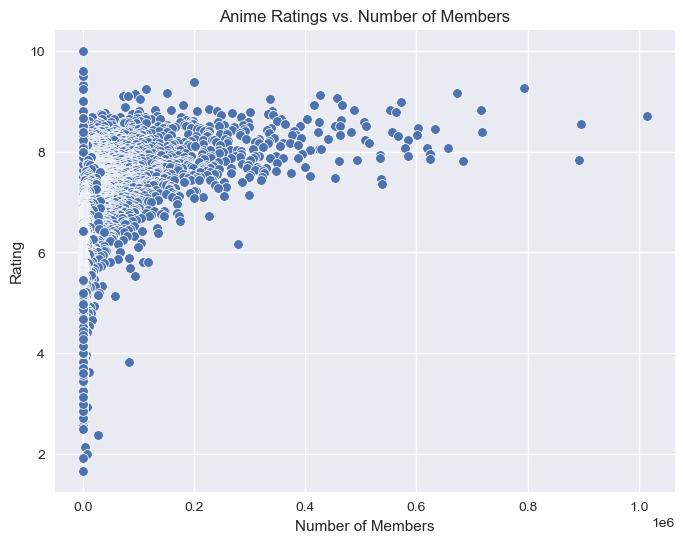

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='members', y='rating', data=anime)
plt.title('Anime Ratings vs. Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.show()

# Checking for duplicate values

In [16]:
duplicated_anime = anime[anime.duplicated()].shape[0]
print(f'count of duplicated anime: {duplicated_anime}')

count of duplicated anime: 0


# Data processing 

In [17]:
anime.loc[(anime["genre"]=="Hentai") & (anime["episodes"]=="Unknown"),"episodes"] = "1"
anime.loc[(anime["type"]=="OVA") & (anime["episodes"]=="Unknown"),"episodes"] = "1"

anime.loc[(anime["type"] == "Movie") & (anime["episodes"] == "Unknown")] = "1"

In [18]:
known_animes = {"Naruto Shippuuden":500, "One Piece":784,"Detective Conan":854, "Dragon Ball Super":86,
                "Crayon Shin chan":942, "Yu Gi Oh Arc V":148,"Shingeki no Kyojin Season 2":25,
                "Boku no Hero Academia 2nd Season":25,"Little Witch Academia TV":25}

In [19]:
for k,v in known_animes.items():    
    anime.loc[anime["name"]==k,"episodes"] = v

In [20]:
anime["episodes"] = anime["episodes"].map(lambda x:np.nan if x=="Unknown" else x)

In [21]:
anime["episodes"].fillna(anime["episodes"].median(),inplace = True)

# Filling the missing rating values

In [22]:
anime["rating"] = anime["rating"].astype(float)

In [23]:
anime["rating"].fillna(anime["rating"].median(),inplace = True)

# Replacing the catagorical values of column type to numerical values

In [24]:
pd.get_dummies(anime[["type"]]).head()

,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [25]:
anime["members"] = anime["members"].astype(float)

# Feature Selection and Preprocessing

In [26]:
anime_features = pd.concat([anime["genre"].str.get_dummies(sep=","),pd.get_dummies(anime[["type"]]),anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)


In [27]:
anime["name"] = anime["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))

In [28]:
anime_features.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,type_1,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,9.37,200630.0,1
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,9.26,793665.0,64
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.25,114262.0,51
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.17,673572.0,24
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,9.16,151266.0,51


In [29]:
anime_features.columns

Index([' Adventure', ' Cars', ' Comedy', ' Dementia', ' Demons', ' Drama',
       ' Ecchi', ' Fantasy', ' Game', ' Harem', ' Hentai', ' Historical',
       ' Horror', ' Josei', ' Kids', ' Magic', ' Martial Arts', ' Mecha',
       ' Military', ' Music', ' Mystery', ' Parody', ' Police',
       ' Psychological', ' Romance', ' Samurai', ' School', ' Sci-Fi',
       ' Seinen', ' Shoujo', ' Shoujo Ai', ' Shounen', ' Shounen Ai',
       ' Slice of Life', ' Space', ' Sports', ' Super Power', ' Supernatural',
       ' Thriller', ' Vampire', ' Yaoi', ' Yuri', '1', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space',
       'Sports', 'Super Power', 'Supernat

In [30]:
max_abs_scaler = MaxAbsScaler()
anime_features = max_abs_scaler.fit_transform(anime_features)

In [31]:
anime_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.37000000e-01, 1.97876158e-01, 5.50055006e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.26000000e-01, 7.82771174e-01, 3.52035204e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        9.25000000e-01, 1.12693643e-01, 2.80528053e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.88000000e-01, 2.15994011e-04, 2.20022002e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.98000000e-01, 1.72597954e-04, 5.50055006e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.46000000e-01, 1.40050911e-04, 5.50055006e-04]])

# KNN for finding similar animes

In [32]:
nbrs = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_features)
distances, indices = nbrs.kneighbors(anime_features)

# Query examples and helper functions

In [33]:
def get_index_from_name(name):
    return anime[anime["name"]==name].index.tolist()[0]

In [34]:
all_anime_names = list(anime.name.values)

In [35]:
def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [36]:
def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.iloc[id]["name"])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.iloc[id]["name"])

# model prediction

In [37]:
print_similar_animes(query="Naruto")

Naruto Shippuuden
Katekyo Hitman Reborn 
Bleach
Dragon Ball Z
Boku no Hero Academia


In [38]:
print_similar_animes("Kimi no Na wa ")

Kokoro ga Sakebitagatterunda 
Harmonie
Air Movie
Hotarubi no Mori e
Clannad Movie


In [39]:
print_similar_animes("Under World")

Tenshi no Habataki Jun
The Satisfaction
Hokenshitsu de Aimashou
Toushindai My Lover Minami tai Mecha Minami
Lovely Series


In [40]:
print_similar_animes("One Piece")

Digimon Frontier
Dragon Ball Z
Dragon Ball Kai
Dragon Ball Super
Shingeki no Kyojin


In [41]:
print_similar_animes("Dragon Ball Z")

Dragon Ball Kai
Dragon Ball Super
Dragon Ball Kai 2014 
Naruto Shippuuden
One Piece


## Cosine Similarity

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
sim = cosine_similarity(anime_features)

In [50]:
print(sim)

[[1.         0.13659377 0.12272295 ... 0.12566123 0.127952   0.40992477]
 [0.13659377 1.         0.43050823 ... 0.0982008  0.09997216 0.10839775]
 [0.12272295 0.43050823 1.         ... 0.10133508 0.10317283 0.11187554]
 ...
 [0.12566123 0.0982008  0.10133508 ... 1.         0.99997951 0.55841529]
 [0.127952   0.09997216 0.10317283 ... 0.99997951 1.         0.55959166]
 [0.40992477 0.10839775 0.11187554 ... 0.55841529 0.55959166 1.        ]]


In [51]:
sim.shape

(12293, 12293)

In [47]:
sim[0]

array([1.        , 0.13659377, 0.12272295, ..., 0.12566123, 0.127952  ,
       0.40992477])